В этом файле проводится генерация данных, вставка данных в БД, извлечение данных и анализ с использованием Python:

In [1]:
import pandas as pd
import psycopg2 as pg
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns

Создание docker и database:
https://alexsaplin.notion.site/alexsaplin/10-a1f16c857c1444a685afdffbafdd0dee

In [2]:
if __name__ == '__main__':
    conn = pg.connect(f"""
        dbname='{"postgres"}' 
        user='{"postgres"}' 
        port='{"5432"}' 
        password='{"postgres"}'
    """)

cursor = conn.cursor()

Для генерации данных используем библиотеку Faker
https://pypi.org/project/Faker/

In [3]:
# Сгенерируем данные и заполним табличку store.
fake = Faker()
comp_1 = fake.company() + " Store"
comp_2 = fake.company() + " Store"
comp_3 = fake.company() + " Store"

cursor.execute("""
INSERT INTO database_project.store (store_id, store_nm) VALUES
    (DEFAULT, %s),
    (DEFAULT, %s),
    (DEFAULT, %s);
""", [comp_1, comp_2, comp_3])

# Сгенерируем данные и заполним табличку client.
cursor.execute("""
INSERT INTO database_project.client (client_id, client_nm, client_surname,
client_username, client_password) VALUES
    (DEFAULT, %s, %s, %s, %s);
""", [fake.first_name(), fake.last_name(), fake.user_name(), fake.password()])

Посмотрим на список всех магазинов в базе данных, включая добавленные только что:

In [4]:
cursor.execute(f"SELECT * FROM database_project.store")
rows = cursor.fetchall()
print("Лист из id store_nm из таблицы store:")
print(rows)
conn.commit()

Лист из id store_nm из таблицы store:
[(1, 'Mall1'), (2, 'City'), (3, 'BestMall'), (4, 'TheBestStore'), (5, 'SuperStore'), (6, 'Mall1234'), (7, 'Yandex Market'), (8, 'Amazon'), (9, 'Интернет-магазин OZON'), (10, 'Интернет-магазин Дикие ягодки'), (14, 'Crosby Group Store'), (15, 'Brown PLC Store'), (16, 'Horne, Cohen and Morris Store'), (20, 'Ramos, Compton and Martinez Store'), (21, 'Cole-Hall Store'), (22, 'Dennis-Anderson Store'), (23, 'Nichols-Tucker Store'), (24, 'Sandoval-Thomas Store'), (25, 'Luna and Sons Store'), (26, 'Wagner-Morales Store'), (27, 'White PLC Store'), (28, 'Owens-Meyer Store'), (29, 'Watts, Williams and Smith Store'), (30, 'Norton Inc Store'), (31, 'Taylor, Simpson and Smith Store'), (32, 'Wise-Norman Store'), (33, 'Vega LLC Store'), (34, 'Hansen Inc Store'), (35, 'Washington-Todd Store'), (36, 'Shields-Wright Store'), (37, 'Gutierrez LLC Store'), (38, 'Anderson-Smith Store'), (39, 'Willis-Rogers Store'), (40, 'Martinez, Carlson and Ramos Store'), (41, 'Cline-Fo

Дальше проведем какой-то анализ с помощью pandas, можем построить графики/хитмапы.

In [5]:
columns = ["client_id", "client_nm", "client_surname", "client_username"]
clients = pd.DataFrame(columns=columns)
cursor.execute(f"SELECT {', '.join(columns)} FROM database_project.client")
rows = cursor.fetchall()
for row in rows:
    clients = pd.concat(
        [clients, pd.DataFrame.from_dict(dict(zip(columns, list(map(lambda x: [x], row)))))],
        ignore_index=True
    )

print("")
print("Dataframe с данными из client без учета client_password, добавлены сгенерированные люди:")
print(clients)


Dataframe с данными из client без учета client_password, добавлены сгенерированные люди:
   client_id  client_nm client_surname  client_username
0          1       Иван         Иванов       Pozitiv4ik
1          2     Андрей        Смирнов      Black_Angel
2          3       Катя       Арбузова  В ожидании чуда
3          4     Марина       Соколова     З@Я_ ИЗ _Р@Я
4          5       Петя       Яблочкин        Baby boom
5          6       Анна       Смирнова      Части4каРая
6          7      Ольга       Сидорова      White_Angel
7          8       John          Black        NeGaTiG4K
8          9      Ксюша         Умнова      F R O Z E N
9         10     Матвей         Ерохин  ПРИКИНЬ, Я КОТ!
10        11     Shelby    Fitzpatrick           karl83
11        12      Emily            Roy       grodriguez
12        13    Tabitha          Reyes     josephporter
13        14    Stephen          Brock     matthewjones
14        15     Cheryl          Smith         kjackson
15        16  

Посмотрим на график с количеством заказов разлчных статусов во всех магазинах.

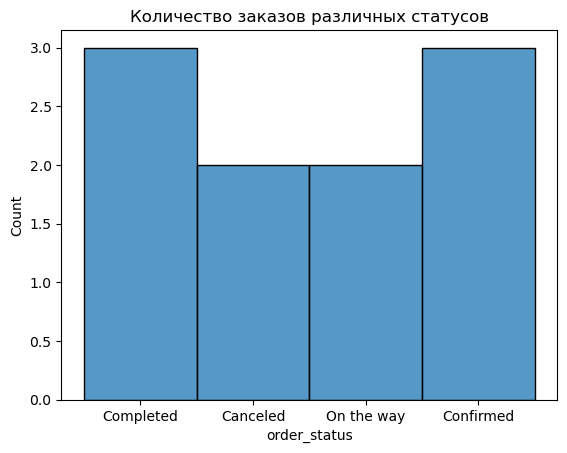

In [6]:
columns = ["order_id", "order_num", "order_status", "order_dttm"]
orders = pd.DataFrame(columns=columns)
cursor.execute(f"SELECT {', '.join(columns)} FROM database_project.order")
rows = cursor.fetchall()
for row in rows:
    orders = pd.concat(
        [orders, pd.DataFrame.from_dict(dict(zip(columns, list(map(lambda x: [x], row)))))],
        ignore_index=True
    )

plt.title("Количество заказов различных статусов")
sns.histplot(data=orders, x='order_status')
plt.show()

Посмотрим на значения в представлении store_products_view:

In [7]:
columns = ["store_id", "product_id", "store_name", "product_nm", "storage_cnt", "product_price"]
store_products_view = pd.DataFrame(columns=columns)
cursor.execute(f"SELECT {', '.join(columns)} FROM database_project.store_products_view")
rows = cursor.fetchall()
for row in rows:
    store_products_view = pd.concat(
        [store_products_view, pd.DataFrame.from_dict(dict(zip(columns, list(map(lambda x: [x], row)))))],
        ignore_index=True
    )

print(store_products_view.head())

         store_id     product_id                   store_name  \
0  ID магазина: 8  ID товара: 13    Название магазина: Amazon   
1  ID магазина: 8  ID товара: 14    Название магазина: Amazon   
2  ID магазина: 3   ID товара: 4  Название магазина: BestMall   
3  ID магазина: 2   ID товара: 3      Название магазина: City   
4  ID магазина: 1   ID товара: 2     Название магазина: Mall1   

                product_nm            storage_cnt     product_price  
0  Название товара: Огурцы     Запасы товара: 700  Цена товара: 200  
1  Название товара: Яблоки     Запасы товара: 250  Цена товара: 150  
2  Название товара: Яблоки  Запасы товара: 2200.5  Цена товара: 150  
3  Название товара: Яблоки  Запасы товара: 1200.5  Цена товара: 150  
4  Название товара: Огурцы     Запасы товара: 500  Цена товара: 200  


Обработаем эти данные. Для начала уберем лишний текст во всех столбцах.

In [8]:
store_products = store_products_view;
store_products['store_id'] = store_products['store_id'].str[13:].astype('int')
store_products['product_id'] = store_products['product_id'].str[11:].astype('int')
store_products['store_name'] = store_products['store_name'].str[19:]
store_products['product_nm'] = store_products['product_nm'].str[17:]
store_products['storage_cnt'] = store_products['storage_cnt'].str[15:].astype('float')
store_products['product_price'] = store_products['product_price'].str[13:].astype('float')
print(store_products.head())

   store_id  product_id store_name product_nm  storage_cnt  product_price
0         8          13     Amazon     Огурцы        700.0          200.0
1         8          14     Amazon     Яблоки        250.0          150.0
2         3           4   BestMall     Яблоки       2200.5          150.0
3         2           3       City     Яблоки       1200.5          150.0
4         1           2      Mall1     Огурцы        500.0          200.0


Посмотрим на цены товаров и хранимое количество в магазине с store_id = 7.

In [9]:
store_products_7 = store_products.loc[(store_products['store_id'] == 7)]
print("Статистика по магазину: " + store_products_7.iloc[0]['store_name'])

Статистика по магазину: Yandex Market


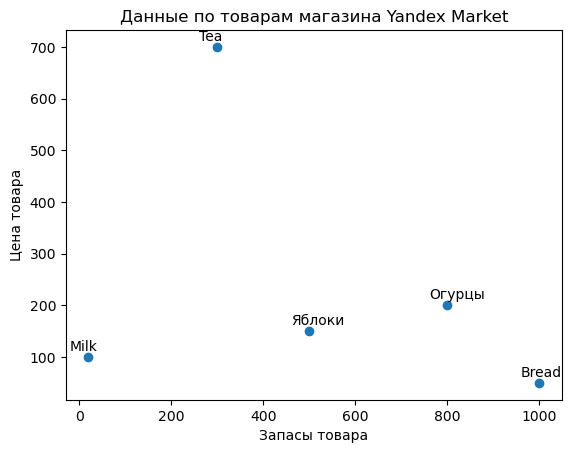

In [10]:
plt.scatter (store_products_7['storage_cnt'], store_products_7['product_price'])
plt.xlabel('Запасы товара')
plt.ylabel('Цена товара')
plt.title("Данные по товарам магазина " + store_products_7.iloc[0]['store_name'])

for i, txt in enumerate(store_products_7['product_nm'].squeeze()):
    plt.annotate(txt, (store_products_7['storage_cnt'].iloc[i]-40, store_products_7['product_price'].iloc[i]+12))
plt.show()